In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import os
import imblearn

In [7]:
main_dir = 'C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/datastorm-2021/'


In [8]:
data_dir = main_dir+'data/feature/'
train_file = data_dir+'cbasi_train.csv'
val_file = data_dir+'cbasi_validation.csv'
test_file = data_dir+'cbasi_test.csv'
NN_dir = main_dir+'src/scripts/NeuralNet/'

In [9]:
train_ds = pd.read_csv(train_file)
val_ds = pd.read_csv(val_file)


In [11]:
def start_category_from_zero(df,columns):
    for each in columns:
        df[each] = df[each] - 1

    return df

In [12]:
start_category_from_zero(train_ds,['Reservation_Status'])
start_category_from_zero(val_ds,['Reservation_Status'])

,Age,Ethnicity,Educational_Level,Income,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Required_Car_Parking,Use_Promotion,Room_Rate,month_Expected_checkin,dayofweek_Expected_checkin,stay,total_participants,Reservation_Status
0,0.785640,-0.017315,-0.001419,0.007453,0.145374,0.010791,0.003794,0.022095,-0.014993,0.004285,0.384342,8,2,2,4,2
1,1.047029,0.010376,-0.003171,0.012407,0.622649,-0.021917,0.003794,0.022095,0.005952,-0.013100,0.270386,8,2,4,4,1
2,0.916334,-0.009340,-0.003171,0.007453,0.622649,0.010791,0.003794,0.022095,-0.014993,0.004285,1.182040,9,3,1,4,1
3,-1.370818,0.010376,-0.003171,0.012407,0.622649,-0.021917,0.003794,-0.069188,-0.014993,0.004285,0.315968,8,2,2,3,0
4,0.197515,-0.009340,-0.003171,0.012407,0.145374,-0.021917,0.003794,0.022095,0.005952,0.004285,0.976918,8,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,-1.436166,-0.017315,-0.003171,-0.012088,-0.444474,-0.021917,0.003794,-0.069188,-0.014993,0.004285,0.543882,11,4,3,7,0
2745,-0.586652,-0.017315,-0.003171,0.012407,0.622649,0.010791,0.003794,0.025248,0.005952,0.004285,-1.575714,12,4,1,5,1
2746,-1.697554,-0.009340,-0.001419,0.012407,0.622649,0.010791,0.003794,-0.069188,-0.014993,0.004285,-0.891973,11,4,2,5,2
2747,-0.129221,-0.009340,-0.003171,0.007453,0.145374,-0.021917,-0.030540,0.022095,0.005952,0.004285,1.159249,11,4,1,6,0


In [13]:
print(train_ds['Reservation_Status'].value_counts())
train_ds.dtypes

0    21240
1    21240
2    21240
Name: Reservation_Status, dtype: int64


Age                           float64
Ethnicity                     float64
Educational_Level             float64
Income                        float64
Meal_Type                     float64
Visted_Previously             float64
Previous_Cancellations        float64
Deposit_type                  float64
Required_Car_Parking          float64
Use_Promotion                 float64
Room_Rate                     float64
month_Expected_checkin          int64
dayofweek_Expected_checkin      int64
stay                            int64
total_participants              int64
Reservation_Status              int64
dtype: object

In [14]:
x_columns = [x for x in train_ds.columns if x != 'Reservation_Status']
y_columns = ['Reservation_Status']
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)
batch_size = 64
input_shape = (len(x_columns))
epochs = 200
print(input_shape)

15


In [18]:
x_columns

['Age',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Required_Car_Parking',
 'Use_Promotion',
 'Room_Rate',
 'month_Expected_checkin',
 'dayofweek_Expected_checkin',
 'stay',
 'total_participants']

In [19]:
x_train = np.asarray(train_ds[x_columns])
y_train = np.asarray(train_ds[y_columns])
x_val = np.asarray(val_ds[x_columns])
y_val = np.asarray(val_ds[y_columns])

In [20]:
x_train.shape

(63720, 15)

In [21]:
y_train.shape

(63720, 1)

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_sm, y_train = sm.fit_resample(x_train, y_train)
x_train = pd.DataFrame(x_sm,columns=x_columns)

In [22]:
x_train.shape

(63720, 15)

In [15]:
y_train.shape

(63720,)

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model.add(tf.keras.layers.Dense(100,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(150,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(150,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(150,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3,activation='softmax'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150)               6

In [25]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= optimizer,
    metrics=['accuracy'])

In [26]:
history = model.fit(x_train,y_train ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (x_val,y_val))

Epoch 1/200
996/996 [==============================] - 4s 3ms/step - loss: 1.1945 - accuracy: 0.3665 - val_loss: 1.1929 - val_accuracy: 0.4089
Epoch 2/200
996/996 [==============================] - 3s 3ms/step - loss: 1.0786 - accuracy: 0.4096 - val_loss: 1.2396 - val_accuracy: 0.3368
Epoch 3/200
996/996 [==============================] - 3s 3ms/step - loss: 1.0697 - accuracy: 0.4193 - val_loss: 1.1893 - val_accuracy: 0.3667
Epoch 4/200
996/996 [==============================] - 3s 3ms/step - loss: 1.0626 - accuracy: 0.4274 - val_loss: 1.1855 - val_accuracy: 0.3507
Epoch 5/200
996/996 [==============================] - 3s 3ms/step - loss: 1.0543 - accuracy: 0.4405 - val_loss: 1.1634 - val_accuracy: 0.3081
Epoch 6/200
996/996 [==============================] - 3s 3ms/step - loss: 1.0492 - accuracy: 0.4459 - val_loss: 1.1280 - val_accuracy: 0.3725
Epoch 7/200
996/996 [==============================] - 3s 3ms/step - loss: 1.0411 - accuracy: 0.4562 - val_loss: 1.0759 - val_accuracy: 0.3700

KeyboardInterrupt: 

In [40]:
prediction_val = model.predict(x_val)
prediction_train  = model.predict(x_train)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
def func(x):
    return x.argmax()
prediction_train = np.apply_along_axis(func, 1, prediction_train)
prediction_val = np.apply_along_axis(func, 1, prediction_val)

In [43]:
y_train

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [44]:
stats =  {
    'train' : {
        'accuracy' : accuracy_score(y_train, prediction_train),
        'precision' : precision_score(y_train,prediction_train, average='macro'),
        'recall' : recall_score(y_train, prediction_train, average='macro'),
        'f1-score' : f1_score(y_train, prediction_train, average='macro')},
    'test' : {
        'accuracy' : accuracy_score(y_val, prediction_val),
        'precision' : precision_score(y_val, prediction_val, average='macro'),
        'recall' : recall_score(y_val, prediction_val, average='macro'),
        'f1-score' : f1_score(y_val, prediction_val, average='macro')
    }
}

In [45]:
print(stats)
with open(NN_dir+'score_BEFOREencode_cb.json','w') as pf:
    json.dump(stats, pf)

{'train': {'accuracy': 0.7488072818581293, 'precision': 0.7526821032065804, 'recall': 0.7488072818581294, 'f1-score': 0.7475477376189285}, 'test': {'accuracy': 0.47981084030556564, 'precision': 0.33831755155284565, 'recall': 0.33816275730193146, 'f1-score': 0.3331924024686565}}


In [46]:
import matplotlib.pyplot as plt
def acc_n_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    with open("metrics.json", 'w') as outfile:
        json.dump({"Training-accuracy": acc[-1], "Validation-accuracy": val_acc[-1], "Training-loss": loss[-1],
                   "Validation-loss": val_loss[-1]}, outfile)

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

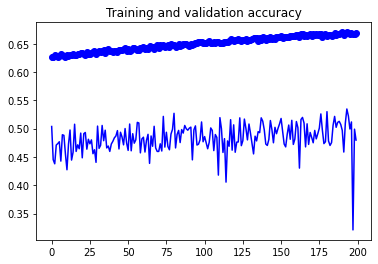

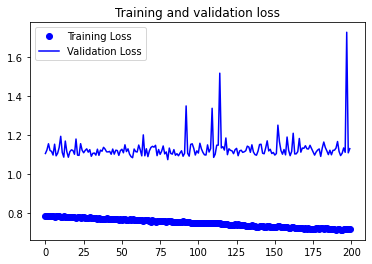

In [47]:
acc_n_loss(history)

In [28]:
test_ds = pd.read_csv(test_file)

In [29]:
test_ds

,Reservation-id,Age,Ethnicity,Educational_Level,Income,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Required_Car_Parking,Use_Promotion,Room_Rate,month_Expected_checkin,dayofweek_Expected_checkin,stay,total_participants
0,62931593,0.524251,0.010376,-0.001419,0.012407,0.145374,0.010791,0.003794,0.022095,0.005952,0.004285,-0.504520,11,4,1,6
1,70586099,0.197515,0.010376,-0.001419,0.012407,0.622649,0.010791,0.003794,0.022095,-0.014993,-0.013100,0.794587,11,4,1,3
2,4230648,-1.044082,-0.009340,-0.001419,0.007453,-0.444474,0.010791,0.003794,0.022095,-0.014993,0.004285,-1.325009,4,4,3,4
3,25192322,1.373765,-0.017315,0.002616,0.012407,0.622649,0.010791,0.003794,0.022095,0.005952,0.004285,-1.552923,11,4,2,6
4,80931528,0.066821,0.014371,-0.003171,0.012407,-0.444474,0.010791,0.003794,-0.069188,-0.014993,-0.013100,-1.279426,11,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,0.589598,0.010376,-0.003171,-0.012088,0.622649,-0.021917,0.003794,0.025248,0.005952,-0.013100,-0.504520,3,2,1,7
4314,5496554,1.243071,-0.017315,-0.003171,-0.012088,0.145374,0.010791,0.003794,-0.069188,0.005952,0.004285,1.318788,3,2,3,6
4315,59004046,0.981682,-0.017315,-0.001419,0.007453,0.622649,0.010791,0.003794,0.022095,0.005952,-0.013100,1.523910,3,2,1,5
4316,65838682,-0.063874,0.014371,-0.003171,0.012407,-0.444474,0.010791,0.003794,0.022095,0.005952,-0.013100,0.749004,3,2,1,7


In [30]:
assert list(test_ds.iloc[:,1:].columns) == x_columns

In [31]:
x_test = np.asarray(test_ds.iloc[:,1:])

In [32]:
x_test

array([[ 5.24251095e-01,  1.03755526e-02, -1.41925334e-03, ...,
         4.00000000e+00,  1.00000000e+00,  6.00000000e+00],
       [ 1.97514996e-01,  1.03755526e-02, -1.41925334e-03, ...,
         4.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       [-1.04408218e+00, -9.33960351e-03, -1.41925334e-03, ...,
         4.00000000e+00,  3.00000000e+00,  4.00000000e+00],
       ...,
       [ 9.81681634e-01, -1.73146040e-02, -1.41925334e-03, ...,
         2.00000000e+00,  1.00000000e+00,  5.00000000e+00],
       [-6.38738835e-02,  1.43712890e-02, -3.17068265e-03, ...,
         2.00000000e+00,  1.00000000e+00,  7.00000000e+00],
       [-7.17346082e-01,  1.43712890e-02,  6.74556842e-03, ...,
         2.00000000e+00,  1.00000000e+00,  5.00000000e+00]])

In [33]:
prediction_test = model.predict(x_test)

In [34]:
prediction_test = np.apply_along_axis(func, 1, prediction_test)

In [35]:
prediction_test

array([0, 2, 1, ..., 1, 0, 0], dtype=int64)

In [36]:
sub_df = pd.DataFrame()
sub_df['Reservation-id'] = test_ds.iloc[:, 0]
sub_df['Reservation_status'] = prediction_test

In [ ]:
if 'predicts' not in os.listdir(NN_dir):
    os.mkdir(NN_dir+'predicts/')

In [ ]:
sub_df.to_csv(NN_dir+'predicts/'+str(stats['test']['f1-score'])+'_.csv')

In [38]:
sub_df.to_csv(NN_dir+'predicts/'+str(stats['test']['f1-score'])+'_.csv')